In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [229]:
file = "./sim_v2/2500_1_sim.json"
data = json.load(open(file))


In [178]:
data["prod_vertex"][0]

[[0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [9.677324885485142, -39.943968210667734, 4.81311258922346],
 [9.677324885485142, -39.943968210667734, 4.81311258922346],
 [-12.80236046103383, 52.83909813127933, -6.366958155516254],
 [-12.80236046103383, 52.83909813127933, -6.366958155516254],
 [18.19895420431849, -27.2207879655261, 2.722140658986219],
 [18.19895420431849, -27.2207879655261, 2.722140658986219],
 [18.19895420431849, -27.2207879655261, 2.722140658986219],
 [18.19895420431849, -27.2207879655261, 2.722140658986219],
 [-142.08888762734998, 447.77504329598406, -197.08776482545008],
 [-142.08888762734998, 447.77504329598406, -197.08776482545008],
 [-142.08888762734998, 447.77504329598406, -197.08776482545008],
 [18.199815225146786, -27.219505099271903, 2.7219267573882866],
 [18.199815225146786, -27.219505099271903, 2.7219267573882866],
 [18.201661109613404, -27.21674967772324, 2.721486905664441],
 [18.201661109613404,

In [212]:
def conversion_pdg(particle,property: str,pdg):
    output = []
    for x in particle:
        if abs(x['pdg']) == pdg:
            output.append(x[property])
    return np.array(output)
def conversion(particle,property: str):
    property = np.array([x[property] for x in particle])
    return property

def stau_hit_count (data,event_number):
    count = 0 
    for i in np.arange(0,event_number):
 #barrel      
        for j in np.arange(0,len(data['VB_x'][i])):
            if np.abs(data['VB_pdg'][i][j]) not in pid:
                continue
            count +=1
#        print('VB_count',count)
#endcap
        for j in np.arange(0,len(data['VE_x'][i])):
            if np.abs(data['VE_pdg'][i][j]) not in pid:
                continue
            count +=1
#        print('VE_count',count)
#Inner Barrel:
        for j in np.arange(0,len(data['IB_x'][i])):
            if np.abs(data['IB_pdg'][i][j]) not in pid:
                continue
            count +=1
#       print('IB_count',count)
#Inner endcap:
        for j in np.arange(0,len(data['IE_x'][i])):
            if np.abs(data['IE_pdg'][i][j]) not in pid:
                continue
            count +=1
#        print('IE_count',count)
#Outer:
        for j in np.arange(0,len(data['OB_x'][i])):
            if np.abs(data['OB_pdg'][i][j]) not in pid:
                continue
            count +=1
#        print('OB_count',count)
    return count

In [218]:
# append all hits from 10 events together 

hits = []
stau_pdg = [1000015,-1000015,2000015,-2000015]
for j in np.arange(0,10,1):
    for i in np.arange(len(data['VB_x'][j])):
        hit = {}
        hit['x']=data['VB_x'][j][i]
        hit['y']=data['VB_y'][j][i]
        hit['z']=data['VB_z'][j][i]
        hit['t']=data['VB_time'][j][i]
        hit['id']=data['VB_mcpid'][j][i]
        hit['pdg']=data['VB_pdg'][j][i]
#        if data['VB_pdg'][j][i] not in stau_pdg:
#            print(j)
        hits.append(hit)
    for i in np.arange(len(data['IB_x'][j])):
        hit = {}
        hit['x']=data['IB_x'][j][i]
        hit['y']=data['IB_y'][j][i]
        hit['z']=data['IB_z'][j][i]
        hit['t']=data['IB_time'][j][i]
        hit['id']=data['IB_mcpid'][j][i]
        hit['pdg']=data['IB_pdg'][j][i]
#        if data['IB_pdg'][j][i] not in stau_pdg:
#            print(j)        
        hits.append(hit)
    for i in np.arange(len(data['IE_x'][j])):
        hit = {}
        hit['x']=data['IE_x'][j][i]
        hit['y']=data['IE_y'][j][i]
        hit['z']=data['IE_z'][j][i]
        hit['t']=data['IE_time'][j][i]
        hit['id']=data['IE_mcpid'][j][i]
        hit['pdg']=data['IE_pdg'][j][i]
#        if data['IE_pdg'][j][i] not in stau_pdg:
#            print(j)
        hits.append(hit)

    for i in np.arange(len(data['VE_x'][j])):
        hit = {}
        hit['x']=data['VE_x'][j][i]
        hit['y']=data['VE_y'][j][i]
        hit['z']=data['VE_z'][j][i]
        hit['t']=data['VE_time'][j][i]
        hit['id']=data['VE_mcpid'][j][i]
        hit['pdg']=data['VE_pdg'][j][i]
#        if data['VE_pdg'][j][i] not in stau_pdg:
#            print(j)
        hits.append(hit)
    for i in np.arange(len(data['OB_x'][j])):
        hit = {}
        hit['x']=data['OB_x'][j][i]
        hit['y']=data['OB_y'][j][i]
        hit['z']=data['OB_z'][j][i]
        hit['t']=data['OB_time'][j][i]
        hit['id']=data['OB_mcpid'][j][i]
        hit['pdg']=data['OB_pdg'][j][i]
 #       if data['OB_pdg'][j][i] not in stau_pdg:
 #           print(j)
        hits.append(hit)
    for i in np.arange(len(data['OE_x'][j])):
        hit = {}
        hit['x']=data['OE_x'][j][i]
        hit['y']=data['OE_y'][j][i]
        hit['z']=data['OE_z'][j][i]
        hit['t']=data['OE_time'][j][i]
        hit['id']=data['OE_mcpid'][j][i]
        hit['pdg']=data['OE_pdg'][j][i]
  #      if data['OE_pdg'][j][i] not in stau_pdg:
  #          print(j)
        hits.append(hit)

In [237]:
#append all hits in one event 

hits = []
j=0
for i in np.arange(len(data['VB_x'][j])):
    hit = {}
    hit['x']=data['VB_x'][j][i]
    hit['y']=data['VB_y'][j][i]
    hit['z']=data['VB_z'][j][i]
    hit['t']=data['VB_time'][j][i]
    hit['id']=data['VB_mcpid'][j][i]
    hit['pdg']=data['VB_pdg'][j][i]
    hits.append(hit)
for i in np.arange(len(data['IB_x'][j])):
    hit = {}
    hit['x']=data['IB_x'][j][i]
    hit['y']=data['IB_y'][j][i]
    hit['z']=data['IB_z'][j][i]
    hit['t']=data['IB_time'][j][i]
    hit['id']=data['IB_mcpid'][j][i]
    hit['pdg']=data['IB_pdg'][j][i]
    hits.append(hit)
for i in np.arange(len(data['IE_x'][j])):
    hit = {}
    hit['x']=data['IE_x'][j][i]
    hit['y']=data['IE_y'][j][i]
    hit['z']=data['IE_z'][j][i]
    hit['t']=data['IE_time'][j][i]
    hit['id']=data['IE_mcpid'][j][i]
    hit['pdg']=data['IE_pdg'][j][i]
    hits.append(hit)

for i in np.arange(len(data['VE_x'][j])):
    hit = {}
    hit['x']=data['VE_x'][j][i]
    hit['y']=data['VE_y'][j][i]
    hit['z']=data['VE_z'][j][i]
    hit['t']=data['VE_time'][j][i]
    hit['id']=data['VE_mcpid'][j][i]
    hit['pdg']=data['VE_pdg'][j][i]
    hits.append(hit)
for i in np.arange(len(data['OB_x'][j])):
    hit = {}
    hit['x']=data['OB_x'][j][i]
    hit['y']=data['OB_y'][j][i]
    hit['z']=data['OB_z'][j][i]
    hit['t']=data['OB_time'][j][i]
    hit['id']=data['OB_mcpid'][j][i]
    hit['pdg']=data['OB_pdg'][j][i]
    hits.append(hit)
for i in np.arange(len(data['OE_x'][j])):
    hit = {}
    hit['x']=data['OE_x'][j][i]
    hit['y']=data['OE_y'][j][i]
    hit['z']=data['OE_z'][j][i]
    hit['t']=data['OE_time'][j][i]
    hit['id']=data['OE_mcpid'][j][i]
    hit['pdg']=data['OE_pdg'][j][i]
    hits.append(hit)



In [238]:
#just to check what particles are produced
hit_pdg = []
for i in conversion(hits,'pdg'):
    if i in hit_pdg:
        continue
    hit_pdg.append(i)
print(hit_pdg)


[2000015, -2000015, 130, 11, 22, 211, 2112, 1000110220, 1000010020, 2212, -321, -11, -15, 1000140290]


Text(0.5, 1.0, '1 event, hit in X-Y Plane')

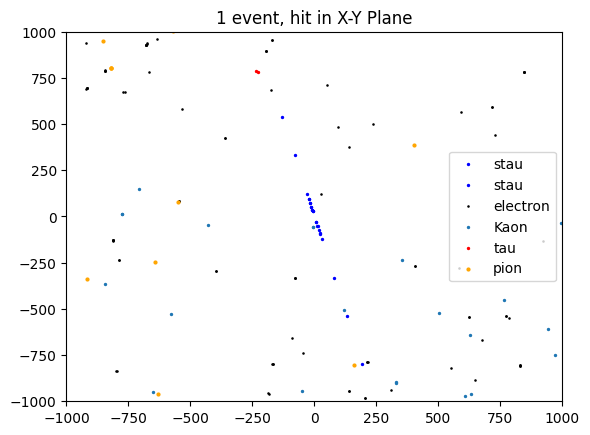

In [239]:
plt.scatter(conversion_pdg(hits,'x',1000015),conversion_pdg(hits,'y',1000015),s=2, label='stau',c='blue')
plt.scatter(conversion_pdg(hits,'x',2000015),conversion_pdg(hits,'y',2000015),s=2, label='stau',c='blue')
plt.scatter(conversion_pdg(hits,'x',11),conversion_pdg(hits,'y',11),s=0.7, label = 'electron',c='black')
#plt.scatter(conversion_pdg(hits,'x',22),conversion_pdg(hits,'y',22),s=4, label = 'photon')
plt.scatter(conversion_pdg(hits,'x',321),conversion_pdg(hits,'y',321),s=2, label = 'Kaon')
#plt.scatter(conversion_pdg(hits,'x',2112),conversion_pdg(hits,'y',2112),s=2, label = 'neutron')
#plt.scatter(conversion_pdg(hits,'x',13),conversion_pdg(hits,'y',13),s=2, label = 'muon')
plt.scatter(conversion_pdg(hits,'x',15),conversion_pdg(hits,'y',15),s=2, label = 'tau',c='red')
plt.scatter(conversion_pdg(hits,'x',211),conversion_pdg(hits,'y',211),s=4, label = 'pion',c='orange')
plt.legend()

plt.xlim(-1000,1000)
plt.ylim(-1000,1000)
plt.title("1 event, hit in X-Y Plane")

Text(0.5, 1.0, '1 event, hits in R-Z plane')

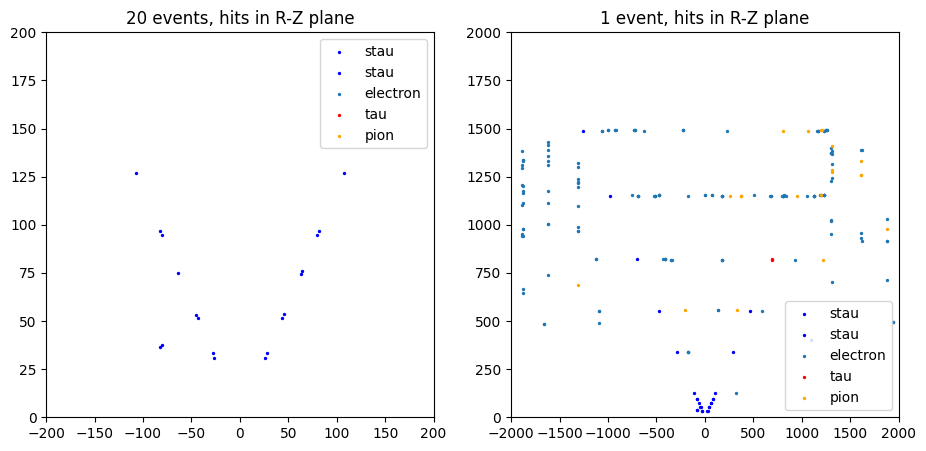

In [240]:
fig,axs=plt.subplots(1,2,figsize=(11,5))

axs[0].scatter(y=np.sqrt(conversion_pdg(hits,'x',1000015)**2+conversion_pdg(hits,'y',1000015)**2),x=conversion_pdg(hits,'z',1000015),s=2, label='stau',c='b')
axs[0].scatter(y=np.sqrt(conversion_pdg(hits,'x',2000015)**2+conversion_pdg(hits,'y',2000015)**2),x=conversion_pdg(hits,'z',2000015),s=2, label='stau',c='b')
axs[0].scatter(y=np.sqrt(conversion_pdg(hits,'x',11)**2+conversion_pdg(hits,'y',11)**2),x=conversion_pdg(hits,'z',11),s=2, label='electron')
#axs[0].scatter(y=np.sqrt(conversion_pdg(hits,'x',22)**2+conversion_pdg(hits,'y',22)**2),x=conversion_pdg(hits,'z',22),s=2, label='photon')
#axs[0].scatter(y=np.sqrt(conversion_pdg(hits,'x',321)**2+conversion_pdg(hits,'y',321)**2),x=conversion_pdg(hits,'z',321),s=2, label='kaon')
#axs[0].scatter(y=np.sqrt(conversion_pdg(hits,'x',2112)**2+conversion_pdg(hits,'y',2112)**2),x=conversion_pdg(hits,'z',2112),s=2, label='neutron')
#axs[0].scatter(y=np.sqrt(conversion_pdg(hits,'x',13)**2+conversion_pdg(hits,'y',13)**2),x=conversion_pdg(hits,'z',13),s=2, label='muon')
axs[0].scatter(y=np.sqrt(conversion_pdg(hits,'x',15)**2+conversion_pdg(hits,'y',15)**2),x=conversion_pdg(hits,'z',15),s=2, label='tau',c='red')
axs[0].scatter(y=np.sqrt(conversion_pdg(hits,'x',211)**2+conversion_pdg(hits,'y',211)**2),x=conversion_pdg(hits,'z',211),s=2, label='pion',c='orange')
axs[0].legend()

axs[0].set_xlim(-200,200)
axs[0].set_ylim(0,200)
axs[0].set_title('20 events, hits in R-Z plane')

axs[1].scatter(y=np.sqrt(conversion_pdg(hits,'x',1000015)**2+conversion_pdg(hits,'y',1000015)**2),x=conversion_pdg(hits,'z',1000015),s=2, label='stau',c='b')
axs[1].scatter(y=np.sqrt(conversion_pdg(hits,'x',2000015)**2+conversion_pdg(hits,'y',2000015)**2),x=conversion_pdg(hits,'z',2000015),s=2, label='stau',c='b')
axs[1].scatter(y=np.sqrt(conversion_pdg(hits,'x',11)**2+conversion_pdg(hits,'y',11)**2),x=conversion_pdg(hits,'z',11),s=2, label='electron')
#axs[1].scatter(y=np.sqrt(conversion_pdg(hits,'x',22)**2+conversion_pdg(hits,'y',22)**2),x=conversion_pdg(hits,'z',22),s=2, label='photon')
#axs[1].scatter(y=np.sqrt(conversion_pdg(hits,'x',321)**2+conversion_pdg(hits,'y',321)**2),x=conversion_pdg(hits,'z',321),s=2, label='kaon')
#axs[1].scatter(y=np.sqrt(conversion_pdg(hits,'x',2112)**2+conversion_pdg(hits,'y',2112)**2),x=conversion_pdg(hits,'z',2112),s=2, label='neutron')
#axs[1].scatter(y=np.sqrt(conversion_pdg(hits,'x',13)**2+conversion_pdg(hits,'y',13)**2),x=conversion_pdg(hits,'z',13),s=2, label='muon')
axs[1].scatter(y=np.sqrt(conversion_pdg(hits,'x',15)**2+conversion_pdg(hits,'y',15)**2),x=conversion_pdg(hits,'z',15),s=2, label='tau',c='red')
axs[1].scatter(y=np.sqrt(conversion_pdg(hits,'x',211)**2+conversion_pdg(hits,'y',211)**2),x=conversion_pdg(hits,'z',211),s=2, label='pion',c='orange')
axs[1].legend()

axs[1].set_xlim(-2000,2000)
axs[1].set_ylim(0,2000)
axs[1].set_title('1 event, hits in R-Z plane')

Text(0.5, 1.0, '1 event, hit in X-Y Plane')

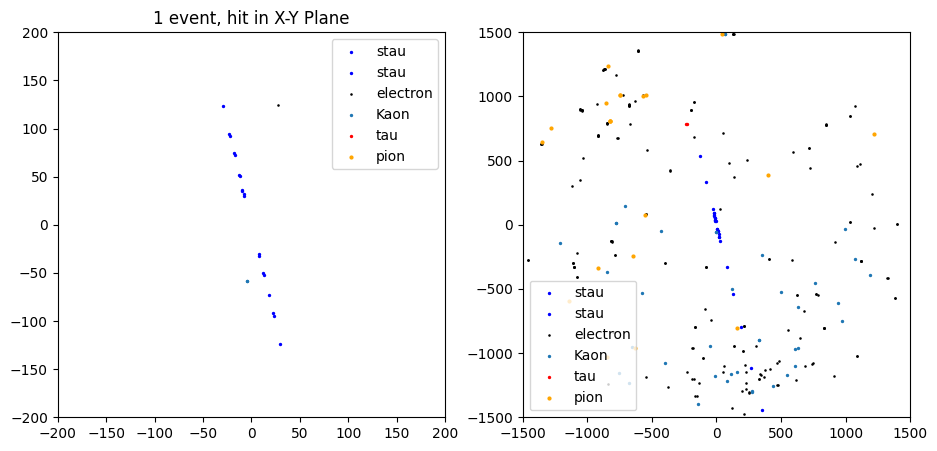

In [241]:
fig,axs=plt.subplots(1,2,figsize=(11,5))
axs[0].scatter(conversion_pdg(hits,'x',1000015),conversion_pdg(hits,'y',1000015),s=2, label='stau',c='blue')
axs[0].scatter(conversion_pdg(hits,'x',2000015),conversion_pdg(hits,'y',2000015),s=2, label='stau',c='blue')
axs[0].scatter(conversion_pdg(hits,'x',11),conversion_pdg(hits,'y',11),s=0.7, label = 'electron',c='black')
#plt.scatter(conversion_pdg(hits,'x',22),conversion_pdg(hits,'y',22),s=4, label = 'photon')
axs[0].scatter(conversion_pdg(hits,'x',321),conversion_pdg(hits,'y',321),s=2, label = 'Kaon')
#plt.scatter(conversion_pdg(hits,'x',2112),conversion_pdg(hits,'y',2112),s=2, label = 'neutron')
#plt.scatter(conversion_pdg(hits,'x',13),conversion_pdg(hits,'y',13),s=2, label = 'muon')
axs[0].scatter(conversion_pdg(hits,'x',15),conversion_pdg(hits,'y',15),s=2, label = 'tau',c='red')
axs[0].scatter(conversion_pdg(hits,'x',211),conversion_pdg(hits,'y',211),s=4, label = 'pion',c='orange')
axs[0].legend()

axs[0].set_xlim(-200,200)
axs[0].set_ylim(-200,200)
axs[0].set_title("10 events, hit in X-Y Plane")

axs[1].scatter(conversion_pdg(hits,'x',1000015),conversion_pdg(hits,'y',1000015),s=2, label='stau',c='blue')
axs[1].scatter(conversion_pdg(hits,'x',2000015),conversion_pdg(hits,'y',2000015),s=2, label='stau',c='blue')
axs[1].scatter(conversion_pdg(hits,'x',11),conversion_pdg(hits,'y',11),s=0.7, label = 'electron',c='black')
#plt.scatter(conversion_pdg(hits,'x',22),conversion_pdg(hits,'y',22),s=4, label = 'photon')
axs[1].scatter(conversion_pdg(hits,'x',321),conversion_pdg(hits,'y',321),s=2, label = 'Kaon')
#plt.scatter(conversion_pdg(hits,'x',2112),conversion_pdg(hits,'y',2112),s=2, label = 'neutron')
#plt.scatter(conversion_pdg(hits,'x',13),conversion_pdg(hits,'y',13),s=2, label = 'muon')
axs[1].scatter(conversion_pdg(hits,'x',15),conversion_pdg(hits,'y',15),s=2, label = 'tau',c='red')
axs[1].scatter(conversion_pdg(hits,'x',211),conversion_pdg(hits,'y',211),s=4, label = 'pion',c='orange')
axs[1].legend()
axs[1].set_xlim(-1500,1500)
axs[1].set_ylim(-1500,1500)
axs[0].set_title("1 event, hit in X-Y Plane")

In [242]:
len(data[][0])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (694086071.py, line 1)